Dataset: [Titanic](https://www.kaggle.com/c/titanic/data)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
titanic_df = sns.load_dataset("titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EDA

In [117]:
titanic_df.dtypes.value_counts()

,count
object,5
int64,4
float64,2
bool,2
category,1
category,1


In [118]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [119]:
columns_to_drop = ['fare','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone']
titanic_df.drop(columns_to_drop, axis="columns", inplace=True)

In [120]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


# Codificación de variables categóricas

In [121]:
titanic_df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64


In [122]:
titanic_df = pd.get_dummies(titanic_df, columns=["sex"], drop_first=True)

In [123]:
titanic_df

,survived,pclass,age,sibsp,parch,sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
886,0,2,27.0,0,0,True
887,1,1,19.0,0,0,False
888,0,3,NaN,1,2,False
889,1,1,26.0,0,0,True


In [124]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   sex_male  891 non-null    bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 35.8 KB


In [125]:
titanic_df["sex_male"] = titanic_df["sex_male"].astype(int)
titanic_df.rename(columns = {"sex_male": "sex"}, inplace=True)
titanic_df.head()

,survived,pclass,age,sibsp,parch,sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


# Entrenamiento

**Paso 1: Dividir el dataset en X e y**

In [126]:
X = titanic_df.drop(columns=["survived"])
y = titanic_df["survived"]

**Paso 2: Dividir el dataset en entrenamineto y test**

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Paso 3: Crear Arbol de Decisión**

In [153]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=42)

**Paso 4: Entrenar el modelo**

In [154]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

**Paso 5: Mostrar el modelo (opcional)**

[Text(0.5, 0.8333333333333334, 'sex <= 0.5\ngini = 0.467\nsamples = 100.0%\nvalue = [0.629, 0.371]\nclass = Not survived'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.396\nsamples = 34.2%\nvalue = [0.272, 0.728]\nclass = Survived'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 17.7%\nvalue = [0.036, 0.964]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 16.5%\nvalue = [0.524, 0.476]\nclass = Not survived'),
 Text(0.75, 0.5, 'age <= 6.5\ngini = 0.302\nsamples = 65.8%\nvalue = [0.815, 0.185]\nclass = Not survived'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.455\nsamples = 3.2%\nvalue = [0.35, 0.65]\nclass = Survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.271\nsamples = 62.6%\nvalue = [0.838, 0.162]\nclass = Not survived')]

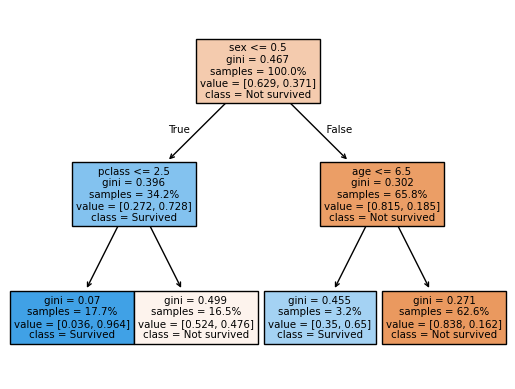

In [155]:
# https://scikit-learn.org/1.5/auto_examples/tree/plot_unveil_tree_structure.html
from sklearn import tree

#plt.figure(figsize=(15,15))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Not survived", "Survived"],
    filled=True,
    proportion=True
)

# Evaluación del modelo

In [156]:
from sklearn.metrics import accuracy_score
y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_acc

0.7723880597014925

**Importancia de las features**

In [157]:
importances = clf.feature_importances_
importances

array([0.21671076, 0.0776829 , 0.        , 0.        , 0.70560634])

In [158]:
columns = X.columns
columns

Index(['pclass', 'age', 'sibsp', 'parch', 'sex'], dtype='object')

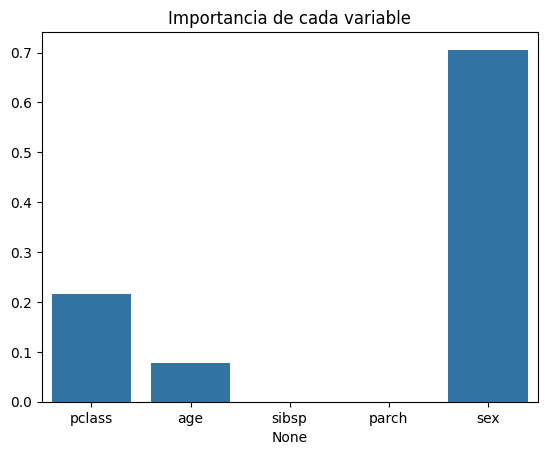

In [159]:
sns.barplot(x=columns, y=importances)
plt.title("Importancia de cada variable")
plt.show()

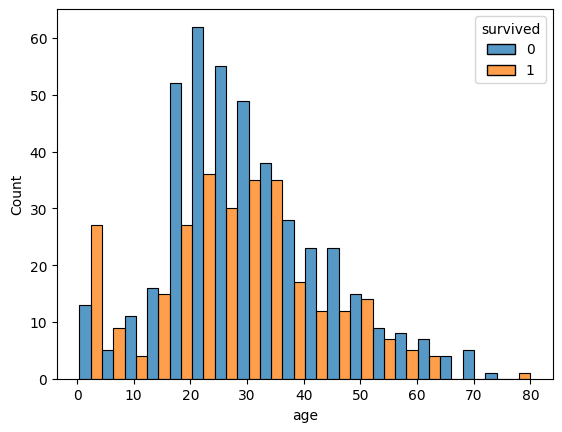

In [160]:
sns.histplot(data=titanic_df, x="age", hue="survived", multiple="dodge")
#sns.histplot(data=titanic_df, x="age", hue="survived", multiple="stack")
#sns.histplot(data=titanic_df, x="age", hue="survived")
plt.show()